# CoreBench #


📊 Microcontroller Benchmark Analysis: QuickSort Performance

This notebook benchmarks the performance of the QuickSort algorithm on various microcontrollers, including:

- ESP32
- ESP32-S3
- ESP32-CAM (ESP32-S)
- ESP8266 (ESP-12E)
- Arduino UNO (ATmega328P)
- Arduino MEGA (ATmega2560)

The goal is to compare execution times across platforms using both single-core and dual-core implementations (where supported), and observe how performance scales with increasing input sizes.

🔍 Key features:
- Data import and cleaning from Excel
- Execution time plots across microcontrollers
- Visual comparison between QuickSort and QuickSort_DualCore (when applicable)
- Scalable structure to easily add benchmarks from new devices

📥 To run it yourself:
1. Download the dataset from [this Google Sheets link](https://docs.google.com/spreadsheets/d/14JbC74Bb0fRlNowO_PPvexM4IoGGFCY1/edit?usp=sharing).
2. Upload the file to your Colab session or Google Drive.
3. Follow the notebook instructions.

Feel free to copy, fork, and expand!


### 📚 All Required Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import drive, files

### 📥 Upload your dataset
#### You need to upload your file manually.
#### "⚠️Remember to download the Excel file from the shared Drive link before running this.⚠️"

In [25]:
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_excel(filename)

# Display the first few rows
df.head()

Saving Result_QuickSort.xlsx to Result_QuickSort (1).xlsx


,Chip,Algorithm,Number of Elements,Runs,Average Time (µs)
0,ESP32,QuickSort,1000.0,5.0,1053.0
1,ESP32,QuickSort,1500.0,5.0,1685.0
2,ESP32,QuickSort,2000.0,5.0,2332.0
3,ESP32,QuickSort,4000.0,5.0,5322.0
4,ESP32,QuickSort,10000.0,5.0,16005.0


## Check for missing (null) values in each column

In [26]:
df.isnull().sum()

,0
Chip,5
Algorithm,5
Number of Elements,5
Runs,5
Average Time (µs),5


In [27]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32 and the two algorithms
df_esp32 = df[(df['Chip'] == 'ESP32') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32[df_esp32['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Algoritmo'

## Arduino UNO (Mega328PU-TH)


In [ ]:
# Set style
sns.set(style="whitegrid")

# Filter only Arduino UNO data
df_arduino = df[df['Chip'] == 'Arduino UNO (Mega328PU-TH)']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each algorithm used on the Arduino
for algorithm in df_arduino['Algorithm'].unique():
    data = df_arduino[df_arduino['Algorithm'] == algorithm]
    data = data.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()
    plt.plot(data['Number of Elements'], data['Average Time (µs)'],
             marker='o', label=f"Arduino - {algorithm}")

# Labels and title
plt.title("Performance on Arduino UNO (Mega328PU-TH)")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Arduino MEGA  (ATMEGA2560 16AU)


In [ ]:
# Set style
sns.set(style="whitegrid")

# Filter MEGA
df_arduino = df[df['Chip'] == 'Arduino MEGA (ATMEGA2560 16AU)'].copy()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each algorithm
for algorithm in df_arduino['Algorithm'].unique():
    data = df_arduino[df_arduino['Algorithm'] == algorithm]
    data = data.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()

    plt.plot(data['Number of Elements'], data['Average Time (µs)'],
             marker='o', label=f"MEGA - {algorithm}")

# Labels and title
plt.title("Performance on Arduino MEGA (ATMEGA2560 16AU)")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ESP32


In [ ]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32 and the two algorithms
df_esp32 = df[(df['Chip'] == 'ESP32') & df['Algorithm'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32[df_esp32['Algorithm'] == algorithm]
    data = data.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()
    plt.plot(data['Number of Elements'], data['Average Time (µs)'],
             marker='o', label=f"ESP32 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ESP32S (ESP-CAM)


In [ ]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32S (CAM) and the two algorithms
df_esp32s_cam = df[(df['Chip'] == 'ESP32S (CAM)') & df['Algorithm'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32s_cam[df_esp32s_cam['Algorithm'] == algorithm]
    data = data.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()
    plt.plot(data['Number of Elements'], data['Average Time (µs)'],
             marker='o', label=f"ESP32S (CAM) - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32S (CAM) – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ESP12-E (ESP 8266)


In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Normalize text (avoid issues with spaces and case)
df['Chip'] = df['Chip'].str.strip()
df['Algorithm'] = df['Algorithm'].str.strip()

# Correct chip and algorithm names
chip_name = 'ESP12-E (8266)'
algorithm_name = 'QuickSort'

# Filter data for ESP12-E with QuickSort
df_esp8266 = df[(df['Chip'] == chip_name) & (df['Algorithm'] == algorithm_name)]

# Check if data exists
if not df_esp8266.empty:
    # Group by number of elements and compute mean times
    data_8266 = df_esp8266.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(data_8266['Number of Elements'], data_8266['Average Time (µs)'],
             marker='o', linestyle='-', color='blue', label=f"{chip_name} - {algorithm_name}")

    # Customization
    plt.title(f"{algorithm_name} Performance on {chip_name}")
    plt.xlabel("Number of Elements")
    plt.ylabel("Average Time (µs)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ No data found for {chip_name} with {algorithm_name}.")


## ESP32S3


In [ ]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32S3 and the two algorithms
df_esp32s3 = df[(df['Chip'] == 'ESP32S3') & df['Algorithm'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32s3[df_esp32s3['Algorithm'] == algorithm]
    data = data.groupby('Number of Elements', as_index=False)['Average Time (µs)'].mean()
    plt.plot(data['Number of Elements'], data['Average Time (µs)'],
             marker='o', label=f"ESP32S3 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32S3 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## All MicroControllers


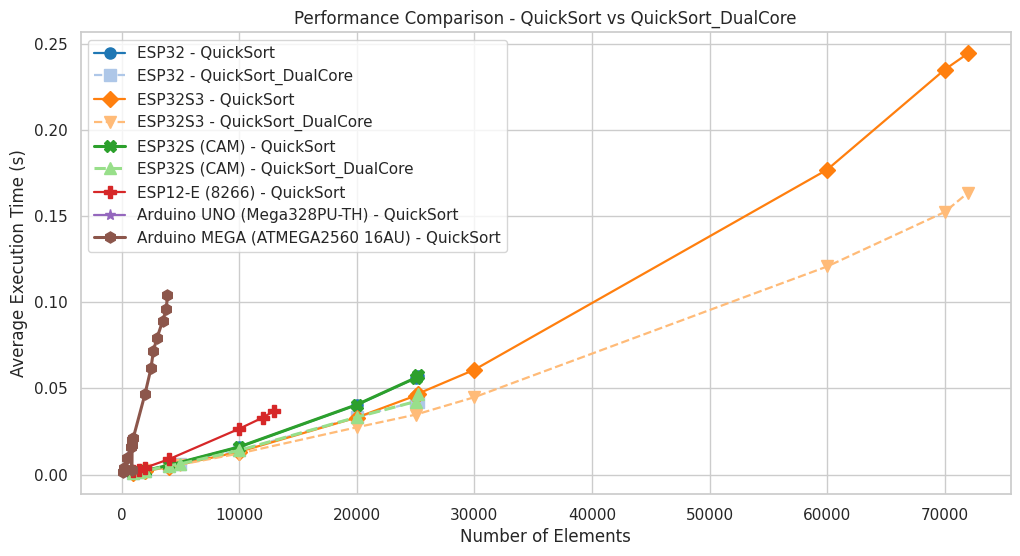

In [28]:
# Seaborn style
sns.set(style="whitegrid")

# Convert µs to seconds (if not converted yet)
df['Average Time (s)'] = df['Average Time (µs)'] / 1_000_000

# Available chips and algorithms
chips = [
    'ESP32',
    'ESP32S3',
    'ESP32S (CAM)',
    'ESP12-E (8266)',
    'Arduino UNO (Mega328PU-TH)',
    'Arduino MEGA (ATMEGA2560 16AU)'
]

algorithms = ['QuickSort', 'QuickSort_DualCore']  # Algorithms used

# Color mapping for plot lines
color_map = {
    ('ESP32', 'QuickSort'): '#1f77b4',
    ('ESP32', 'QuickSort_DualCore'): '#aec7e8',
    ('ESP32S3', 'QuickSort'): '#ff7f0e',
    ('ESP32S3', 'QuickSort_DualCore'): '#ffbb78',
    ('ESP32S (CAM)', 'QuickSort'): '#2ca02c',
    ('ESP32S (CAM)', 'QuickSort_DualCore'): '#98df8a',
    ('ESP12-E (8266)', 'QuickSort'): '#d62728',
    ('Arduino UNO (Mega328PU-TH)', 'QuickSort'): '#9467bd',
    ('Arduino MEGA (ATMEGA2560 16AU)', 'QuickSort'): '#8c564b'
}

# Line styles
line_styles = {
    'QuickSort': '-',
    'QuickSort_DualCore': '--'
}

# Marker styles
marker_map = {
    ('ESP32', 'QuickSort'): 'o',
    ('ESP32', 'QuickSort_DualCore'): 's',
    ('ESP32S3', 'QuickSort'): 'D',
    ('ESP32S3', 'QuickSort_DualCore'): 'v',
    ('ESP32S (CAM)', 'QuickSort'): 'X',
    ('ESP32S (CAM)', 'QuickSort_DualCore'): '^',
    ('ESP12-E (8266)', 'QuickSort'): 'P',
    ('Arduino UNO (Mega328PU-TH)', 'QuickSort'): '*',
    ('Arduino MEGA (ATMEGA2560 16AU)', 'QuickSort'): 'h'
}

# Create checkboxes
checkboxes = {chip: widgets.Checkbox(value=True, description=chip) for chip in chips}

# Select all button
toggle_button = widgets.Button(description="Select All")

# UI container
ui = widgets.VBox([
    widgets.HBox(list(checkboxes.values())),
    toggle_button
])

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.close(fig)  # Prevent duplicate output in notebooks

# Update plot function
def update_plot(_=None):
    ax.clear()

    selected_chips = [chip for chip, checkbox in checkboxes.items() if checkbox.value]

    for chip in selected_chips:
        for algorithm in algorithms:
            data = df[(df['Chip'] == chip) & (df['Algorithm'] == algorithm)]
            if not data.empty:
                grouped = data.groupby('Number of Elements', as_index=False)['Average Time (s)'].mean()
                ax.plot(
                    grouped['Number of Elements'],
                    grouped['Average Time (s)'],
                    marker=marker_map.get((chip, algorithm), 'o'),
                    label=f"{chip} - {algorithm}",
                    color=color_map.get((chip, algorithm), 'gray'),
                    linestyle=line_styles.get(algorithm, '-'),
                    linewidth=2.2 if chip in ['ESP32S (CAM)', 'Arduino MEGA (ATMEGA2560 16AU)'] else 1.6,
                    markersize=8
                )

    ax.set_title("Performance Comparison - QuickSort vs QuickSort_DualCore")
    ax.set_xlabel("Number of Elements")
    ax.set_ylabel("Average Execution Time (s)")
    ax.legend()
    ax.grid(True)

    clear_output(wait=True)
    display(ui)
    display(fig)

# Connect checkboxes to update function
for cb in checkboxes.values():
    cb.observe(update_plot, names='value')

# Select/deselect all function
def toggle_all(b):
    all_selected = all(cb.value for cb in checkboxes.values())
    for cb in checkboxes.values():
        cb.value = not all_selected

toggle_button.on_click(toggle_all)

# Initial display
display(ui)
update_plot()
